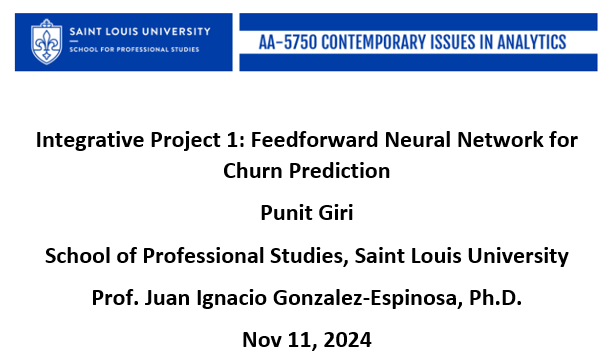

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

1. Dataset and Exploratory Data Analysis (EDA)

In [ ]:
# Load and display the dataset
df = pd.read_csv('/content/Bank_Clents.csv')
print("Dataset Overview:")
print(df.head())
print(df.info())

Dataset Overview:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63      

In [ ]:
# Check for missing values and duplicates
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())

Missing Values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Duplicate Rows: 0


In [ ]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [ ]:
# Initial summary statistics to understand the data distribution
print(df.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

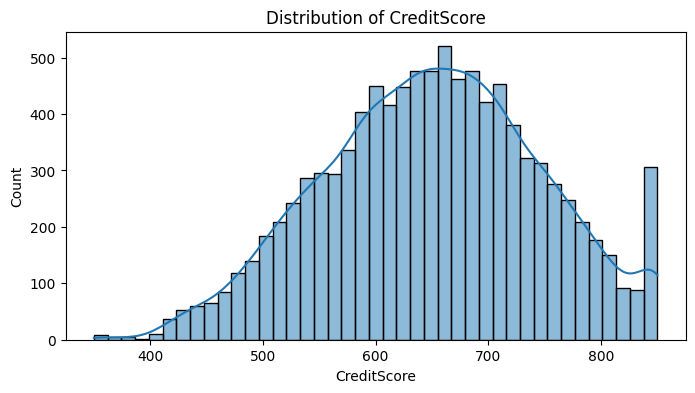

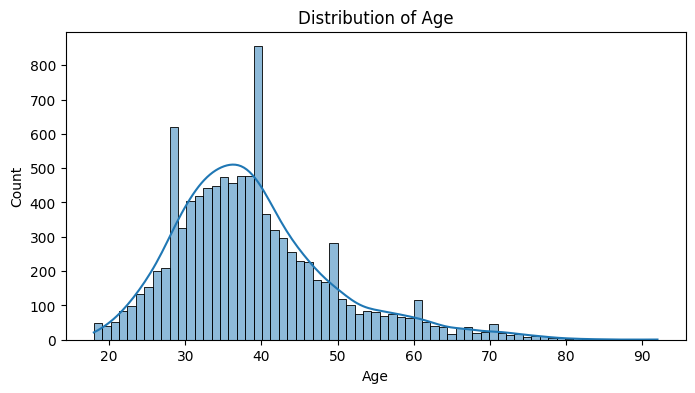

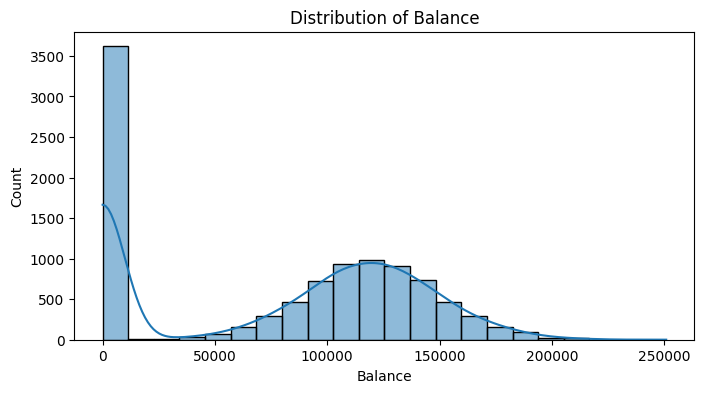

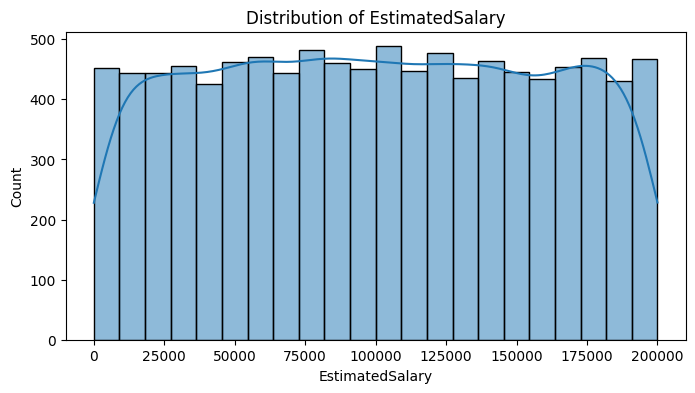

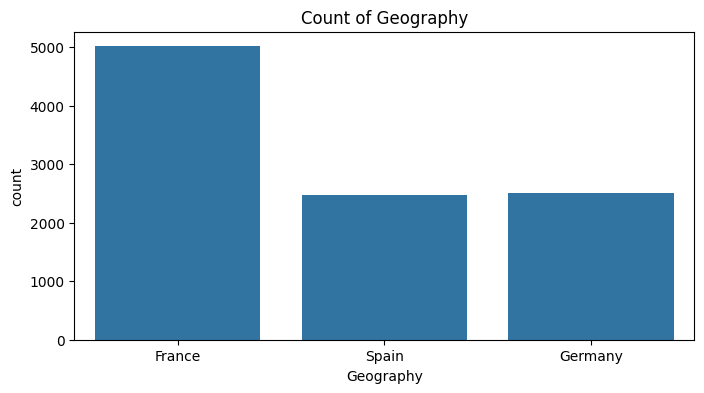

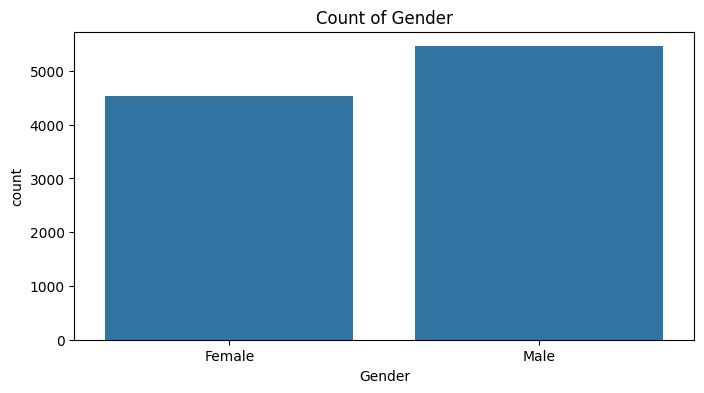

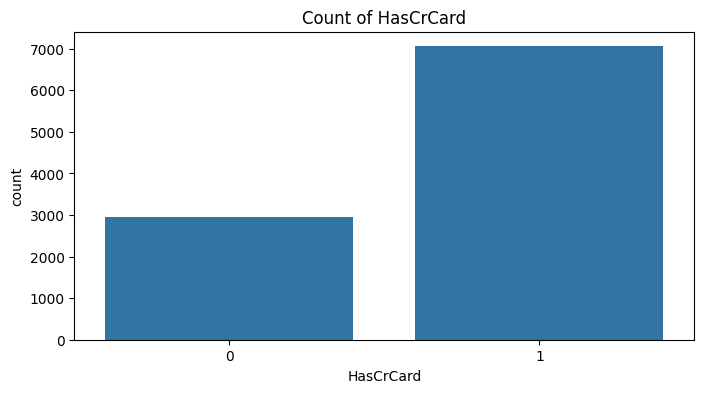

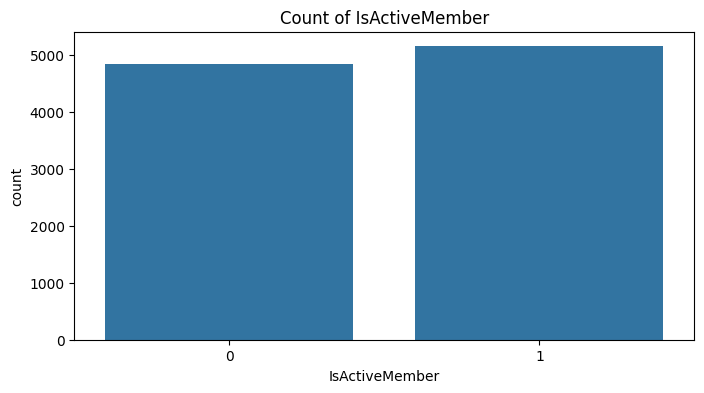

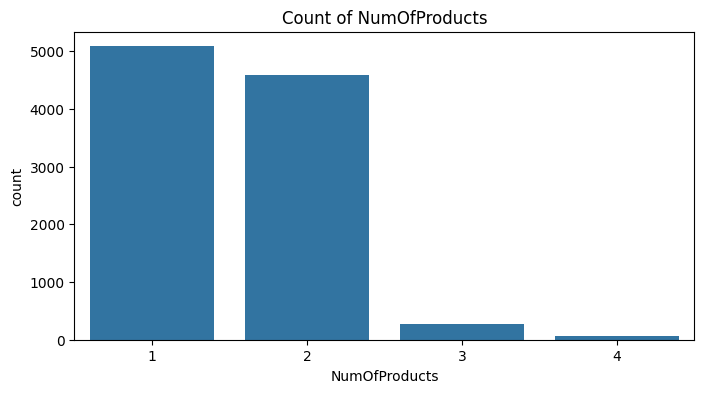

In [ ]:
# Univariate Analysis
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.show()

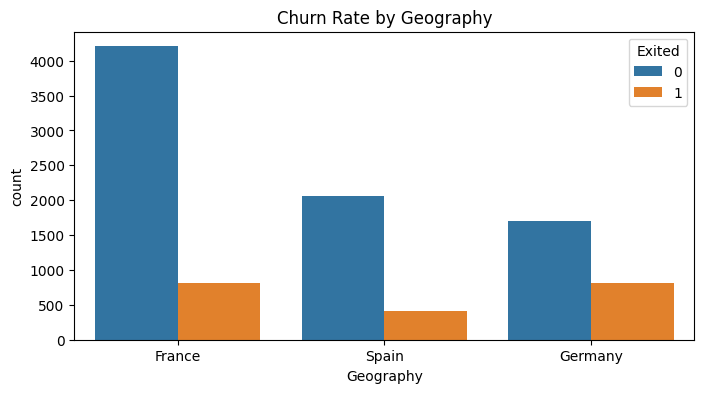

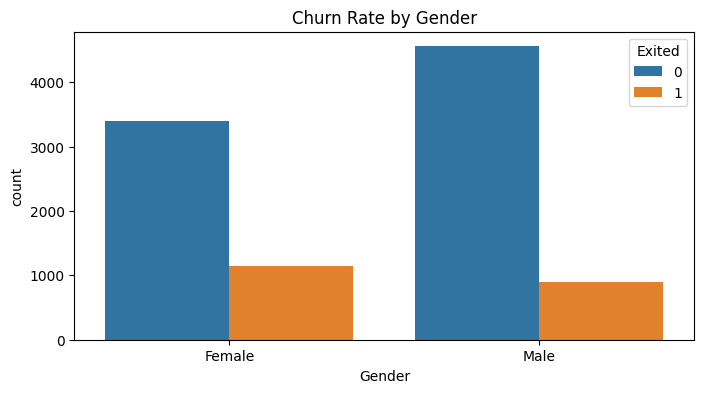

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(8, 4))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn Rate by Geography')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn Rate by Gender')
plt.show()

** Unique features of the dataset included in the model and key meaningful observations.**

The dataset includes both numerical and categorical features that describe customer characteristics. Key features for the model include:

*   **Numerical:** *CreditScore*, *Age*, *Balance*, and *EstimatedSalary* influence financial behavior and customer stability, which may impact churn.

*   **Categorical:** *Geography*, *Gender*, *HasCrCard*, *IsActiveMember*, and *NumOfProducts* reflect customer demographics and engagement which can affect churn probability.

2. Data Preprocessing

In [ ]:
# Split target and predictors
X = df.drop(columns=['Exited'])
y = df['Exited']

In [ ]:
# One-Hot Encode categorical variables before splitting
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

3. Model Building

In [ ]:
# Model Building - Initial Model
def build_model_1():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Model Building - Improved Model with Batch Normalization and L2 Regularization
def build_model_2():
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Early Stopping for both models
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Train Model 1
print("Training Model 1...")
model_1 = build_model_1()
history_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

Training Model 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7244 - loss: 0.6224 - val_accuracy: 0.8010 - val_loss: 0.5111
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8017 - loss: 0.4623 - val_accuracy: 0.7915 - val_loss: 0.5460
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8204 - loss: 0.3818 - val_accuracy: 0.7895 - val_loss: 0.5910
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8440 - loss: 0.3418 - val_accuracy: 0.7845 - val_loss: 0.6194
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8606 - loss: 0.3072 - val_accuracy: 0.7805 - val_loss: 0.6532
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8656 - loss: 0.2975 - val_accuracy: 0.7750 - val_loss: 0.6728


In [ ]:
# Train Model 2
print("Training Model 2...")
model_2 = build_model_2()
history_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

Training Model 2...
Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6106 - loss: 1.4383 - val_accuracy: 0.8005 - val_loss: 0.8757
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7829 - loss: 0.8540 - val_accuracy: 0.7875 - val_loss: 0.8176
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8248 - loss: 0.7315 - val_accuracy: 0.7865 - val_loss: 0.7798
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8366 - loss: 0.6609 - val_accuracy: 0.7960 - val_loss: 0.7466
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8354 - loss: 0.6191 - val_accuracy: 0.7855 - val_loss: 0.7381


In [ ]:
# Random Forest Model for comparison (Model 3)
from sklearn.ensemble import RandomForestClassifier
print("Training Model 3...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

Training Model 3...


RandomForestClassifier(class_weight='balanced', random_state=42)

4. Model Performance Evaluation

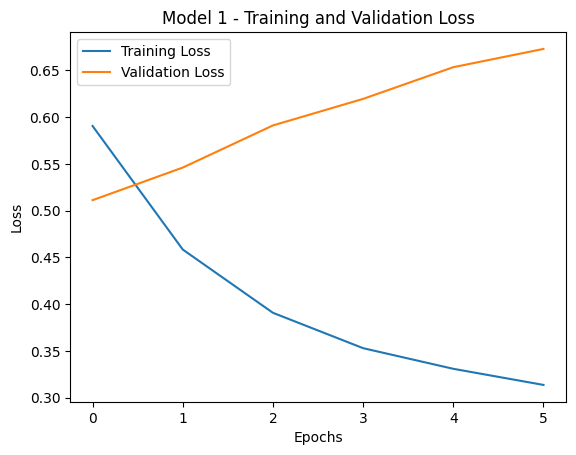

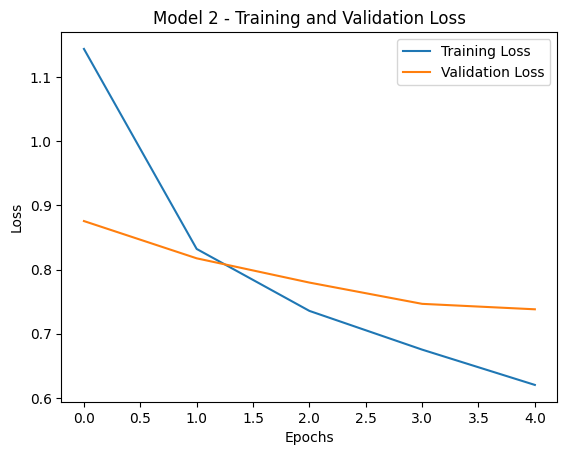

In [ ]:
# Plot training and validation loss for both models
def plot_loss(history, model_name):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history_1, "Model 1")
plot_loss(history_2, "Model 2")

For this binary classification problem, F1 score is the most appropriate metric to use. This is because the dataset may have an imbalanced distribution between churned and non-churned customers, and the F1 score balances both precision and recall.

In [ ]:
# Evaluate both models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}")
    return accuracy, f1

print("\n-- Evaluating Model 1 --")
acc1, f1_1 = evaluate_model(model_1, X_test, y_test, "Model 1")

print("\n-- Evaluating Model 2 --")
acc2, f1_2 = evaluate_model(model_2, X_test, y_test, "Model 2")

print("\n-- Evaluating Model 3 --")
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
print(f"Model 3 (Random Forest) - Accuracy: {rf_accuracy:.2f}, F1 Score: {rf_f1:.2f}")


-- Evaluating Model 1 --
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Model 1 - Accuracy: 0.80, F1 Score: 0.00

-- Evaluating Model 2 --
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Model 2 - Accuracy: 0.80, F1 Score: 0.05

-- Evaluating Model 3 --
Model 3 (Random Forest) - Accuracy: 0.86, F1 Score: 0.47


**Model 1:** The high accuracy suggests that the model is predicting the majority class (non-churned customers) well, but it struggles with predicting churned customers (the minority class). The F1 score of 0.00 indicates poor performance on the minority class, meaning the model likely has a bias toward non-churners.

**Model 2:** Although slightly lower in accuracy than Model 1, Model 2 shows a small improvement in the F1 score. The use of batch normalization and regularization may have helped prevent overfitting, but the model still struggles with correctly predicting churned customers.

**Model 3:** The Model 3 (Random Forest) handles the class imbalance better, showing a more balanced prediction of both churned and non-churned customers.

**Conclusion**

The Random Forest model outperforms both Neural Network models in terms of both accuracy and F1 score. The Random Forest model has the highest accuracy and F1 score, making it a more reliable choice, especially when dealing with class imbalance, which is crucial in churn prediction.